In [1]:
import pandas as pd

jan_data = pd.read_parquet("./data/green_tripdata_2022-02.parquet")
jan_data.shape

(69399, 20)

In [2]:
jan_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.5,0.5,0.5,1.02,0.0,None,0.3,7.82,1.0,1.0,0.00
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.5,0.5,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.2,0.0,0.5,0.00,0.0,None,0.3,43.00,1.0,1.0,0.00
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.0,0.5,0.5,0.00,0.0,None,0.3,50.30,2.0,1.0,0.00
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.0,0.5,0.5,4.50,0.0,None,0.3,29.55,1.0,1.0,2.75


In [3]:
jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,69399.000000,69399,69399,61978.000000,69399.000000,69399.000000,61978.00000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,61978.000000,61978.000000,61978.000000
mean,1.850517,2022-02-14 22:21:25.209613,2022-02-14 22:41:19.206689,1.198796,98.913904,136.606003,1.26795,96.154986,14.070630,0.356017,0.423729,1.801974,0.202369,0.297471,17.788976,1.391187,1.042386,0.719102
min,1.000000,2009-01-01 00:02:32,2009-01-01 14:31:35,1.000000,1.000000,1.000000,0.00000,0.000000,-165.000000,-4.500000,-0.500000,-0.990000,0.000000,-0.300000,-165.300000,1.000000,1.000000,-2.750000
25%,2.000000,2022-02-08 02:29:01,2022-02-08 03:16:25,1.000000,61.000000,74.000000,1.00000,1.100000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.780000,1.000000,1.000000,0.000000
50%,2.000000,2022-02-14 23:50:36,2022-02-15 00:08:39,1.000000,75.000000,138.000000,1.00000,1.930000,10.500000,0.000000,0.500000,1.160000,0.000000,0.300000,14.160000,1.000000,1.000000,0.000000
75%,2.000000,2022-02-22 06:54:11.500000,2022-02-22 07:15:26.500000,1.000000,130.000000,215.000000,1.00000,3.560000,17.000000,0.500000,0.500000,2.760000,0.000000,0.300000,21.350000,2.000000,1.000000,2.750000
max,2.000000,2022-03-01 10:04:17,2022-03-01 20:09:43,6.000000,265.000000,265.000000,9.00000,259777.570000,420.000000,4.500000,3.550000,250.000000,38.750000,0.300000,421.300000,5.000000,2.000000,2.750000
std,0.356567,NaN,NaN,0.861625,63.128032,77.125833,0.89894,3335.401400,12.266505,0.661292,0.184683,3.118095,1.186615,0.035359,13.988396,0.507374,0.201470,1.208780


In [4]:
jan_data.isna().any()

VendorID                 False
lpep_pickup_datetime     False
lpep_dropoff_datetime    False
store_and_fwd_flag        True
RatecodeID                True
PULocationID             False
DOLocationID             False
passenger_count           True
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
ehail_fee                 True
improvement_surcharge    False
total_amount             False
payment_type              True
trip_type                 True
congestion_surcharge      True
dtype: bool

In [5]:
jan_data["duratioin_min"] = jan_data.lpep_dropoff_datetime - jan_data.lpep_pickup_datetime

jan_data["duratioin_min"] = jan_data.duratioin_min.apply(lambda x : x.total_seconds()/60)

print(jan_data.shape)
jan_data.head()

(69399, 21)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duratioin_min
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.5,...,0.5,1.02,0.0,None,0.3,7.82,1.0,1.0,0.00,4.150000
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.5,...,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00,3.083333
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.2,...,0.5,0.00,0.0,None,0.3,43.00,1.0,1.0,0.00,27.283333
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.0,...,0.5,0.00,0.0,None,0.3,50.30,2.0,1.0,0.00,41.650000
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.0,...,0.5,4.50,0.0,None,0.3,29.55,1.0,1.0,2.75,23.333333


In [6]:

jan_data["duratioin_min"]

0         4.150000
1         3.083333
2        27.283333
3        41.650000
4        23.333333
           ...    
69394    11.000000
69395    11.000000
69396     9.000000
69397     8.000000
69398    21.000000
Name: duratioin_min, Length: 69399, dtype: float64

In [7]:
jan_data  = jan_data[ (jan_data.duratioin_min >=0 )& (jan_data.duratioin_min <=60 )]
jan_data = jan_data[(jan_data.passenger_count > 0 ) & (jan_data.passenger_count <= 8) ]
jan_data.shape

(60689, 21)

<Axes: >

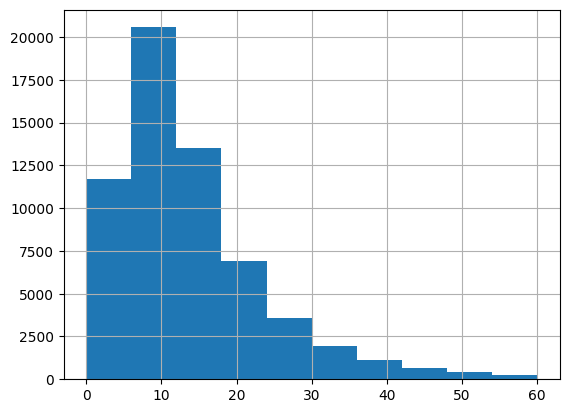

In [8]:
jan_data.duratioin_min.hist()

In [9]:
jan_data.shape

(60689, 21)

In [10]:
train_data = jan_data[:50000]
val_data = jan_data[50000:]

In [66]:
target_label = "duratioin_min"
num_features = ["passenger_count", "trip_distance","fare_amount", "total_amount"]

dates = ["lpep_pickup_datetime","lpep_dropoff_datetime"]

In [78]:
train_df = train_data[num_features]
print(train_df.shape)
train_df.head()

(50000, 4)


,passenger_count,trip_distance,fare_amount,total_amount
0,1.0,1.16,5.5,7.82
1,1.0,0.57,4.5,5.80
2,1.0,0.00,42.2,43.00
3,1.0,16.62,49.0,50.30
4,1.0,5.97,21.0,29.55


In [79]:
val_df = val_data[num_features]
print(val_df.shape)
val_df.head()


(10689, 4)


,passenger_count,trip_distance,fare_amount,total_amount
51081,1.0,2.60,11.0,15.05
51082,1.0,8.13,25.0,29.05
51083,1.0,1.29,7.0,10.38
51084,1.0,3.30,12.0,19.25
51085,1.0,0.00,18.2,19.00


In [80]:
train_data[target_label].shape


(50000,)

In [81]:
train_df.shape

(50000, 4)

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df,train_data[target_label])

LinearRegression()

In [84]:
train_preds = model.predict(train_df)

train_df["prediction"] = train_preds
train_df.head()

,passenger_count,trip_distance,fare_amount,total_amount,prediction
0,1.0,1.16,5.5,7.82,8.707837
1,1.0,0.57,4.5,5.80,7.368592
2,1.0,0.00,42.2,43.00,21.621931
3,1.0,16.62,49.0,50.30,49.222027
4,1.0,5.97,21.0,29.55,22.461006


In [ ]:
val_preds = model.predict(val_df)

val_df["prediction"] = val_preds
val_df.head()

/var/folders/xd/3z5vvpds0zxf_pypxd4cn3d80000gn/T/ipykernel_83823/783198459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df["prediction"] = val_preds


,passenger_count,trip_distance,fare_amount,total_amount,prediction
51081,1.0,2.60,11.0,15.05,13.162872
51082,1.0,8.13,25.0,29.05,27.048577
51083,1.0,1.29,7.0,10.38,9.562380
51084,1.0,3.30,12.0,19.25,14.786076
51085,1.0,0.00,18.2,19.00,11.988333


In [85]:
from evidently.report import Report
from evidently import ColumnMapping
from evidently.metrics import ColumnDriftMetric, DatasetDriftMetric, DatasetMissingValuesMetric

reference_data = train_df
column_mapping = ColumnMapping(
    target = None,
    prediction= "prediction",
    numerical_features = num_features,
    
)


In [20]:
# !pip install evidently

In [86]:
report = Report(
    ColumnDriftMetric(column_name="prediction"),
    DatasetDriftMetric(),
    DatasetMissingValuesMetric()
)

In [87]:
reference_data.shape

(50000, 5)

In [88]:
val_df.shape

(10689, 4)

In [92]:
jan_data['prediction'] = jan_data['duratioin_min']
jan_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duratioin_min,prediction
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.5,...,1.02,0.0,None,0.3,7.82,1.0,1.0,0.00,4.150000,4.150000
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.5,...,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00,3.083333,3.083333
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.2,...,0.00,0.0,None,0.3,43.00,1.0,1.0,0.00,27.283333,27.283333
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.0,...,0.00,0.0,None,0.3,50.30,2.0,1.0,0.00,41.650000,41.650000
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.0,...,4.50,0.0,None,0.3,29.55,1.0,1.0,2.75,23.333333,23.333333


In [93]:
report.run(reference_data=reference_data,current_data=jan_data,
           column_mapping= column_mapping)

ValueError: Incorrect item instead of a metric or metric preset was passed to Report